In [1]:
import pandas as pd
import numpy as np
import sqlite3
import pandasql
from pandasql import sqldf
import matplotlib.pyplot as plt
import sklearn

pysqldf = lambda q: sqldf(q, globals())

# q = """
# ;"""
# data_cleaned = pysqldf(q)
# data_cleaned

## Imports
importing all files


In [2]:
data1 = pd.read_csv("./data/202004-divvy-tripdata.csv")
data2 = pd.read_csv("./data/202005-divvy-tripdata.csv")
data3 = pd.read_csv("./data/202006-divvy-tripdata.csv")
data4 = pd.read_csv("./data/202007-divvy-tripdata.csv")
data5 = pd.read_csv("./data/202008-divvy-tripdata.csv")
data6 = pd.read_csv("./data/202009-divvy-tripdata.csv")
data7 = pd.read_csv("./data/202010-divvy-tripdata.csv")
data8 = pd.read_csv("./data/202011-divvy-tripdata.csv")
data9 = pd.read_csv("./data/202012-divvy-tripdata.csv")


In [3]:

data10 = pd.read_csv("./data/202101-divvy-tripdata.csv")
data11 = pd.read_csv("./data/202102-divvy-tripdata.csv")
data12 = pd.read_csv("./data/202103-divvy-tripdata.csv")
data13 = pd.read_csv("./data/202104-divvy-tripdata.csv")
data14 = pd.read_csv("./data/202105-divvy-tripdata.csv")
data15 = pd.read_csv("./data/202106-divvy-tripdata.csv")
data16 = pd.read_csv("./data/202107-divvy-tripdata.csv")
data17 = pd.read_csv("./data/202108-divvy-tripdata.csv")
data22 = pd.read_csv("./data/Divvy_Trips_2020_Q1.csv")


In [4]:

# data19 = pd.read_csv("./data/Divvy_Trips_2019_Q2")

# data18 = pd.read_csv("./data/Divvy_Trips_2019_Q1")

# data20 = pd.read_csv("./data/Divvy_Trips_2019_Q3.csv")
# data21 = pd.read_csv("./data/Divvy_Trips_2019_Q4.csv")


In [5]:
data_cleaned = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13, data14, data15, data16, data17, data22])
data_cleaned.sort_values(by='started_at', inplace=True)

# Casual vs Member Riders

- Differences between the 2 kinds of users
    - Who bikes more often?
    - Are there differences in the times they bike at? (time of day; day of week; month of year)
    - Are there differences in the rideable types?
    - Are there differences in duration?
    - Differences in Location?

## Basic EDA
Finding the distribution of each type and how often they use Cyclist.

In [6]:
# Number of customers in each group
data_desc = data_cleaned['member_casual'].describe()
# print(d['freq']/d['count'])

# Trip duration of each group
data_cleaned['duration'] = pd.to_datetime(data_cleaned['ended_at']) - pd.to_datetime(data_cleaned['started_at'])
data_cleaned['duration'] = data_cleaned['duration'].dt.seconds/3600
group_duration = data_cleaned.groupby('member_casual')['duration'].agg('sum')

# Trip number of each group
data_cleaned['trips'] = 1
trip_amt = data_cleaned.groupby('member_casual')['trips'].agg('sum')



In [7]:
groups = ['member', 'casual']

fig = plt.figure(figsize=(18,10), dpi=1600)

ax1 = plt.subplot2grid((1,3),(0,0))
plt.pie([data_desc['freq'], data_desc['count']], labels=groups, autopct='%1.2f%%')
plt.title('Number of members vs casual customers')
#next one
ax1 = plt.subplot2grid((1, 3), (0, 1))
plt.pie([float(group_duration['member']), float(group_duration['casual'])], labels=groups, autopct='%1.2f%%')
plt.title('Duration of trips for members vs casual')

ax1 = plt.subplot2grid((1, 3), (0, 2))
plt.pie([float(trip_amt['member']), float(trip_amt['casual'])], labels=groups, autopct='%1.2f%%')
plt.title('Number of trips for members vs casual')
# plt.show()

Text(0.5, 1.0, 'Number of trips for members vs casual')

## Daily Distribution
How often does each customer type use Cyclist and at what times.

In [122]:
from sklearn import preprocessing
pd.options.mode.chained_assignment = None

# Scatter Plot:
# Color to show member vs casual 
# Opacity to show number of trips
# x-axis plots the time of day
# y-axis plots the total ride Time

def get_class_data(data1_times, name):
    member_data = data1_times[data1_times['member_casual'] == name]
    member_data.loc[:, 'hour'] = pd.to_datetime(member_data['started_at']).dt.hour
    member_data.loc[:, 'trips'] = 1
    member_data.loc[:, 'duration'] = member_data['duration'].dt.seconds/3600
    member_scatter = member_data.groupby(['hour'])['duration'].agg('sum')
    alphas = member_data.groupby(['hour'])['trips'].agg('sum')
    member_x = list(member_scatter.index)
    member_y = list(member_scatter.values)

    docked_bike = member_data[member_data['rideable_type'] == 'docked_bike']
    electric_bike =  member_data[member_data['rideable_type'] == 'electric_bike']
    classic_bike =  member_data[member_data['rideable_type'] == 'classic_bike']
    docked_hour = docked_bike.groupby(['hour'])['rideable_type'].agg('count')
    electric_hour = electric_bike.groupby(['hour'])['rideable_type'].agg('count')
    classic_hour = classic_bike.groupby(['hour'])['rideable_type'].agg('count')
    bike_df = pd.DataFrame({'docked': docked_hour, 'electric': electric_hour, 'classic': classic_hour})
    
    return member_x, member_y, alphas, bike_df

def create_versus_scatter(data, month):
    data_times = data.drop(data.columns[[4,5,6,7,8,9,10,11]], axis=1)
    data_times.loc[:, 'duration'] = pd.to_datetime(data_times['ended_at']) - pd.to_datetime(data_times['started_at'])

    member_x, member_y, alphas_m,  bike_df_m = get_class_data(data_times, 'member')
    casual_x, casual_y, alphas_c,  bike_df_c = get_class_data(data_times, 'casual')
    fig, ax = plt.subplots(1)
    ax.scatter(member_x, member_y, color='#BE4152', label='member')
    ax.scatter(casual_x, casual_y, color='teal', label='casual')
    ax.legend(loc='upper left')
    ax.set_ylabel('total duration in the bike (in hours)')
    ax.set_xlabel('hour of day')
    ax.set_title(f'Member vs Casual bike rides for {month}')
    plt.rcParams["figure.figsize"] = (12,3)
    ax.set_xticks(member_x)
    ax.set_xticklabels(x_labels, rotation=45)

    ax2=ax.twinx()
    ax2.plot(member_x, alphas_m, color='#BE4152', label='member')
    ax2.plot(member_x, alphas_c, color='teal', label='casual')
    

    if bike_df_m['electric'].sum() != 0:
        ax2.scatter(member_x, bike_df_m['docked'], color='#BE4152', marker='v', label='docked_bike')
        ax2.scatter(member_x, bike_df_m['electric'], color='#BE4152', marker='s', label='electric_bike')
        ax2.scatter(member_x, bike_df_m['classic'], color='#BE4152', marker='+', label='classic_bike')

        ax2.scatter(member_x, bike_df_c['docked'], color='teal', marker='v', label='docked_bike')
        ax2.scatter(member_x, bike_df_c['electric'], color='teal', marker='s', label='electric_bike')
        ax2.scatter(member_x, bike_df_c['classic'], color='teal', marker='+', label='classic_bike')
    
    ax2.legend(loc='upper right')
    ax2.set_ylabel("number of trips")
    plt.show()

    return bike_df_c


x_labels = ['12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am','11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']

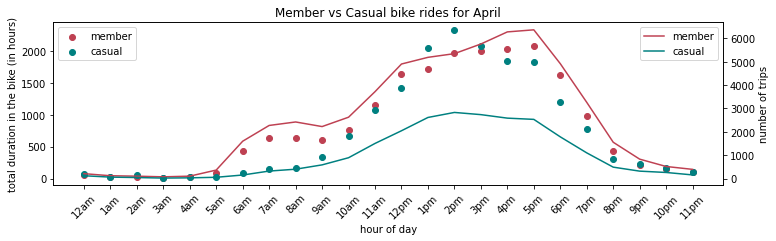

In [123]:
bike = create_versus_scatter(data1, 'April')
# create_versus_scatter(data2, 'May')
# create_versus_scatter(data3, 'June')

## Comparing month-to-month data for riders
What times of the day do riders use Cyclist?

In [87]:
# split the days into 4 sections and apply on each month.
morning = [4, 5, 6, 7, 8, 9]
afternoon = [10, 11, 12, 13, 14, 15]
evening = [16, 17, 18, 19, 20, 21]
night = [22, 23, 0, 1, 2, 3]

In [88]:
store = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13, data14, data15, data16, data17]
months = ['April 2020', 'May 2020', 'June 2020', 'July 2020', 'August 2020', 'September 2020', 'October 2020', 'November 2020', 'December 2020', 'January 2021', 'February 2021', 'March 2021', 'April 2021', 'May 2021', 'June 2021', 'July 2021', 'August 2021']


def create_stacked_bar(data, month):
    data_times = data.drop(data.columns[[4,5,6,7,8,9,10,11]], axis=1)
    data_times['duration'] = pd.to_datetime(data_times['ended_at']) - pd.to_datetime(data_times['started_at'])
    data_times['duration'] = data_times['duration'].dt.seconds/3600
    data_times['hour'] = pd.to_datetime(data_times['started_at']).dt.hour
    data_times['hour'].loc[(data_times['hour'] >= 22) | (data_times['hour'] <= 3)] = 3
    data_times['hour'].loc[(data_times['hour'] >= 4) & (data_times['hour'] <= 9)] = 0
    data_times['hour'].loc[(data_times['hour'] >= 10) & (data_times['hour'] <= 15)] = 1
    data_times['hour'].loc[(data_times['hour'] >= 16) & (data_times['hour'] <= 21)] = 2
    y = pd.DataFrame(data_times.groupby('hour')['duration'].agg(sum))
    y.index = ['morning', 'afternoon', 'evening', 'night']
    y = y.T
    y.index = [month]
    return y

def create_bar_df(data, name, y, index):
    split_dat = split_data(data, name)
    y = y.append(create_stacked_bar(split_dat, months[index]))
    return y

def split_data(data, name):
    member_data = data[data['member_casual'] == name]
    return member_data



# member data:
member_bar_df = pd.DataFrame()
for k, i in enumerate(store):
    member_bar_df = create_bar_df(i, 'member', member_bar_df, k)

# casual data:
casual_bar_df = pd.DataFrame()
for k, i in enumerate(store):
    casual_bar_df = create_bar_df(i, 'casual', casual_bar_df, k)


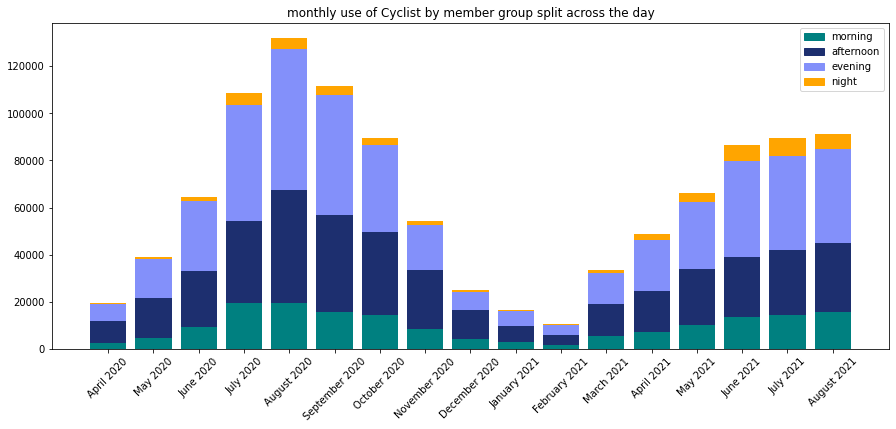

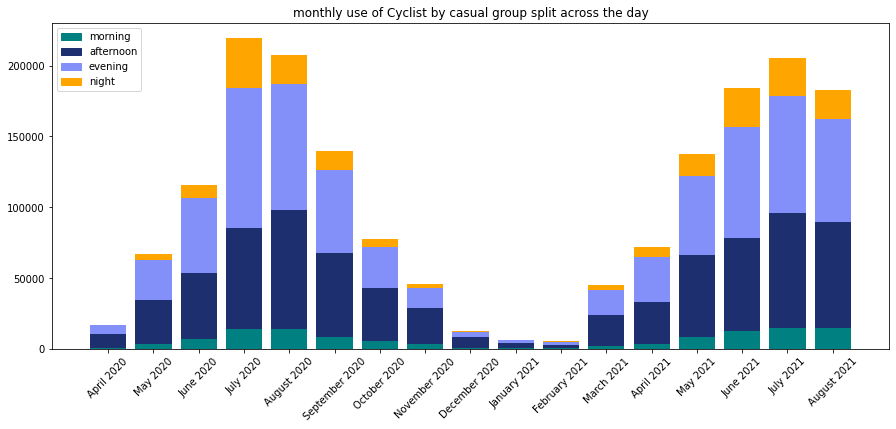

In [89]:
import matplotlib.patches as mpatches

def plot_bar_chart(y, group_name):
    fields = ['morning','afternoon', 'evening', 'night']
    colors = [ 'teal', '#1D2F6F', '#8390FA', 'orange']

    fig, ax = plt.subplots(1, figsize=(15, 6))
    left = len(y) * [0]
    for idx, name in enumerate(fields):
        plt.bar(y.index, y[name], bottom = left, color=colors[idx])
        left = left + y[name]

    morn = mpatches.Patch(color='teal', label='morning')
    aft = mpatches.Patch(color='#1D2F6F', label='afternoon')
    eve = mpatches.Patch(color='#8390FA', label='evening')
    night = mpatches.Patch(color='orange', label='night')

    plt.legend(handles=[morn, aft,eve, night ])
    plt.title(f"monthly use of Cyclist by {group_name} group split across the day")
    plt.xticks(rotation=45)

plot_bar_chart(member_bar_df, 'member')
plot_bar_chart(casual_bar_df, 'casual')

## Further Analysis
New EDA -- Rideable Type

In [111]:
data6['rideable_type'].value_counts()

docked_bike      404606
electric_bike    128352
Name: rideable_type, dtype: int64

# Comments

- Seasonal Use
    - Bikes are used more often during the summers so price change
- Daily use
    - During the day, bikes are used more often during 12pm - 6pm. Change Price Accordingly
    - The members have more trips while the casual users have more duration spent each trip. If you start having weekly/monthly passes for casual members, you could try to move them into an annual user gradually
- Bike Type 
    - Change
